<a href="https://colab.research.google.com/github/wanessaneves/Projetos-DataAnalytics/blob/main/Explorando_o_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importando o pandas

In [ ]:
import pandas as pd


#Lendo a base de dados

In [ ]:
dados = pd.read_csv('/content/tips.csv')

#Aplicando algumas estatísticas descritivas

In [ ]:
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [ ]:
dados.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [ ]:
dados.shape

(244, 6)

#Traduzindo os campos

In [ ]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [ ]:
renomear = {
    'total_bill': 'valor_da_conta',
    'tip': 'gorjeta',
    'dessert': 'sobremesa',
    'day': 'dia_da_semana',
    'time': 'hora_do_dia',
    'size': 'total_de_pessoas'

}

In [ ]:
type(dados)

pandas.core.frame.DataFrame

In [ ]:
gorjetas = dados.rename(columns=renomear)

In [ ]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2


###Visualizando os tipos de da coluna sobremesa (dado categórico)

In [ ]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
sim_nao = {
    'No': 'Não',
    'Yes': 'Sim'
}

In [ ]:
gorjetas.sobremesa.map(sim_nao)

0      Não
1      Não
2      Não
3      Não
4      Não
      ... 
239    Não
240    Sim
241    Sim
242    Não
243    Não
Name: sobremesa, Length: 244, dtype: object

In [ ]:
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)

In [ ]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Sun,Dinner,2
1,10.34,1.66,Não,Sun,Dinner,3
2,21.01,3.50,Não,Sun,Dinner,3
3,23.68,3.31,Não,Sun,Dinner,2
4,24.59,3.61,Não,Sun,Dinner,4


###visualizando os dias da semana

In [ ]:
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [ ]:
dias_semana = {
    'Sun': 'Domingo',
    'Sat': 'Sábado',
    'Thur': 'Quinta',
    'Fri': 'Sexta'

}

In [ ]:
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dias_semana)

In [ ]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Dinner,2
1,10.34,1.66,Não,Domingo,Dinner,3
2,21.01,3.50,Não,Domingo,Dinner,3
3,23.68,3.31,Não,Domingo,Dinner,2
4,24.59,3.61,Não,Domingo,Dinner,4


In [ ]:
gorjetas.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [ ]:
hora_dia = {
    'Dinner': 'Jantar',
    'Lunch': 'Almoço'
}

In [ ]:
gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(hora_dia)

In [ ]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


###Respondendo a pergunta de análise:
####Será que o valor da refeição influencia no valor da gorjeta?

###Importando o seaborn

In [ ]:
!pip install seaborn==0.9.0

In [ ]:
import seaborn as sns

In [ ]:
!pip show seaborn

Name: seaborn
Version: 0.9.0
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@nyu.edu
License: BSD (3-clause)
Location: /usr/local/lib/python3.10/dist-packages
Requires: matplotlib, numpy, pandas, scipy
Required-by: missingno


In [ ]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


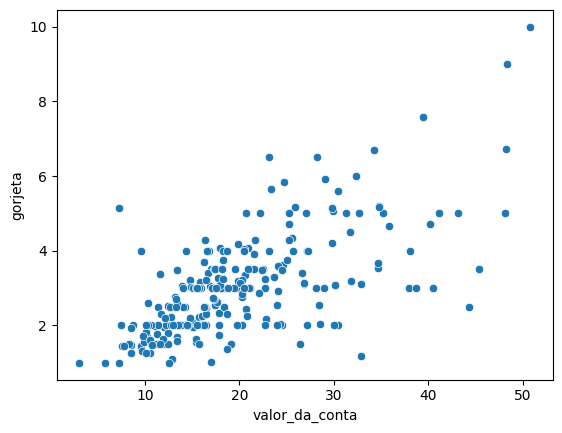

In [ ]:
valor_gorjeta = sns.scatterplot(x='valor_da_conta', y='gorjeta', data=gorjetas)

###Visualmente o valor da gorjeta aumenta na medida em que o valor da conta aumenta

In [ ]:
print('a base de dados contem {} registros \n'.format(gorjetas.shape[0]))
print('registro não nulos: {}'.format(gorjetas.count()))

a base de dados contem 244 registros 

registro não nulos: valor_da_conta      244
gorjeta             244
sobremesa           244
dia_da_semana       244
hora_do_dia         244
total_de_pessoas    244
dtype: int64


####Criando o campo porcentagem

In [ ]:
gorjetas['porcentagem'] = (gorjetas['gorjeta']/gorjetas['valor_da_conta']).round(2)

In [ ]:
gorjetas.head(10)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15
5,25.29,4.71,Não,Domingo,Jantar,4,0.19
6,8.77,2.00,Não,Domingo,Jantar,2,0.23
7,26.88,3.12,Não,Domingo,Jantar,4,0.12
8,15.04,1.96,Não,Domingo,Jantar,2,0.13
9,14.78,3.23,Não,Domingo,Jantar,2,0.22


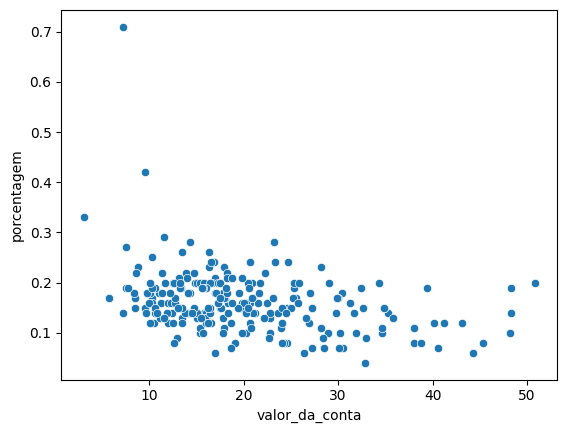

In [ ]:
porcentagem_conta = sns.scatterplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

####O valor da conta não é proporcional ao valor da gorjeta


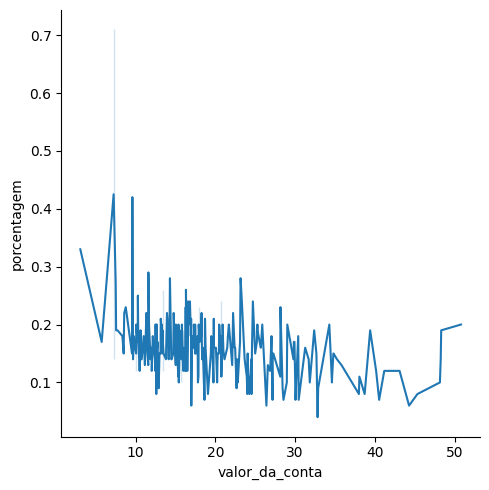

In [ ]:
porcentagem_conta_linha = sns.relplot(x='valor_da_conta', y='porcentagem', kind='line', data=gorjetas)

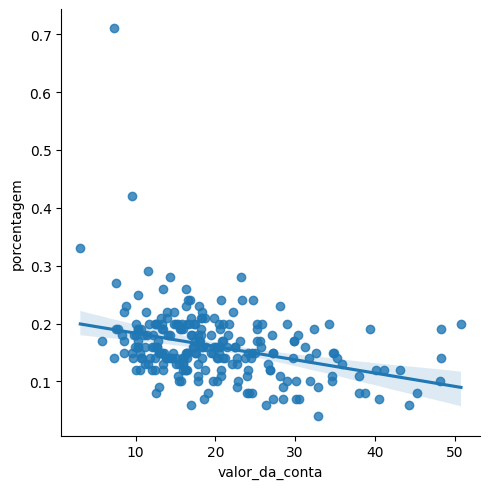

In [ ]:
sns.lmplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

##A sobremesa influencia no valor da gorjeta?


In [ ]:
gorjetas[gorjetas.sobremesa == 'Sim'].describe().round()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,93.0,93.0,93.0,93.0
mean,21.0,3.0,2.0,0.0
std,10.0,1.0,1.0,0.0
min,3.0,1.0,1.0,0.0
25%,13.0,2.0,2.0,0.0
50%,18.0,3.0,2.0,0.0
75%,27.0,4.0,3.0,0.0
max,51.0,10.0,5.0,1.0


In [ ]:
gorjetas[gorjetas.sobremesa == 'Não'].describe().round()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,151.0,151.0,151.0,151.0
mean,19.0,3.0,3.0,0.0
std,8.0,1.0,1.0,0.0
min,7.0,1.0,1.0,0.0
25%,13.0,2.0,2.0,0.0
50%,18.0,3.0,2.0,0.0
75%,23.0,4.0,3.0,0.0
max,48.0,9.0,6.0,0.0


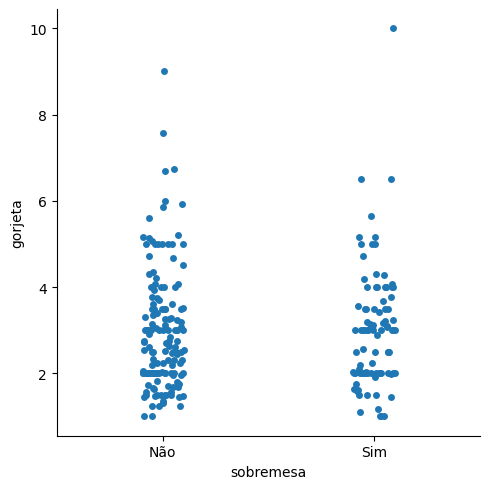

In [ ]:
sns.catplot(x='sobremesa', y='gorjeta', data=gorjetas)

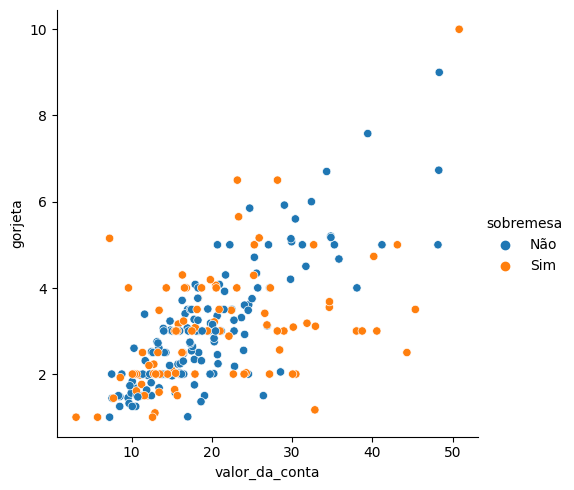

In [ ]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', data=gorjetas)

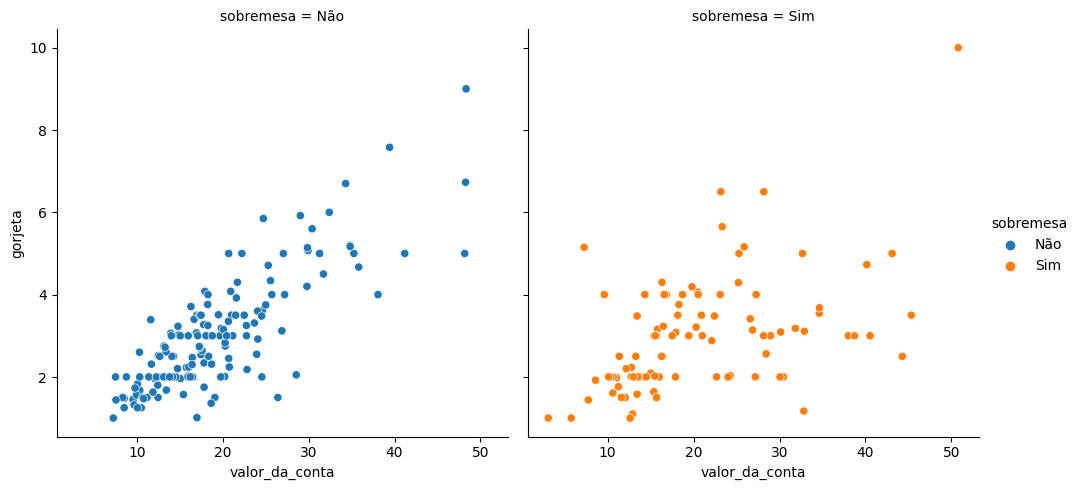

In [ ]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', col='sobremesa', data=gorjetas)

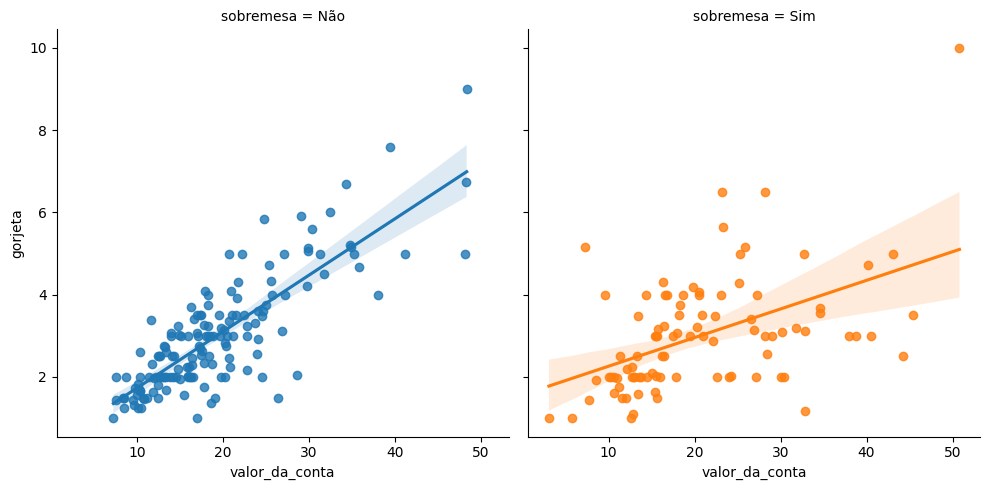

In [ ]:
sns.lmplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', col='sobremesa', data=gorjetas)

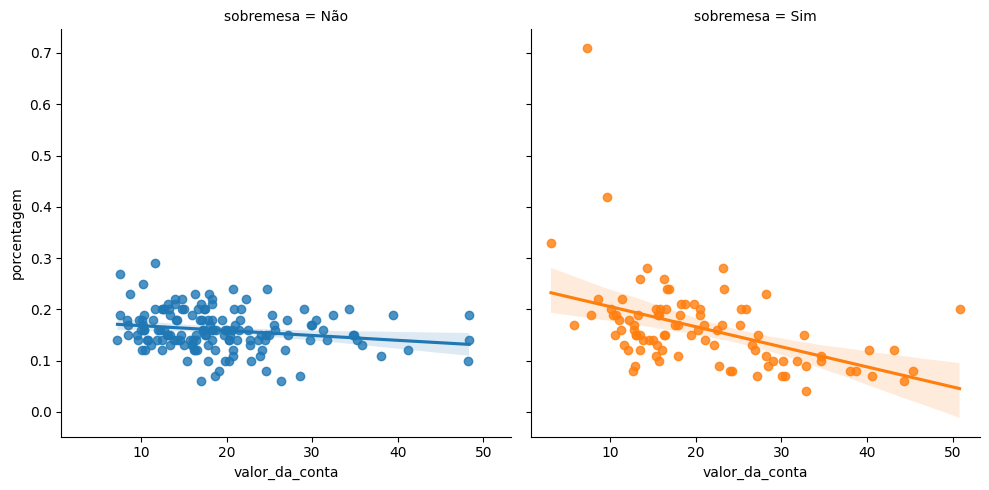

In [ ]:
sns.lmplot(x='valor_da_conta', y='porcentagem', hue='sobremesa', col='sobremesa', data=gorjetas)

####Visualmente existe uma diferença no valor da gorjeta entre aqueles que pediram sobremesa e os que não pediram

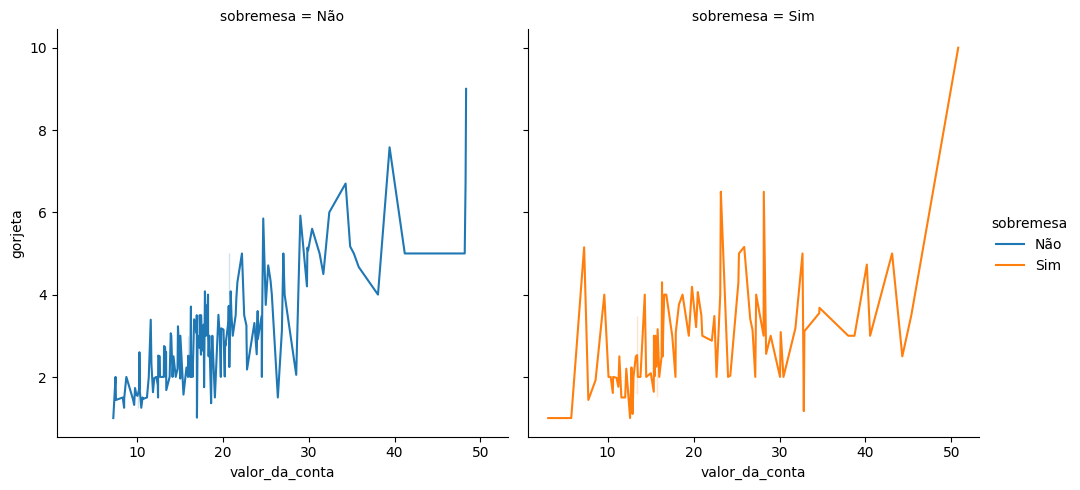

In [ ]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', col='sobremesa', kind='line', data=gorjetas)

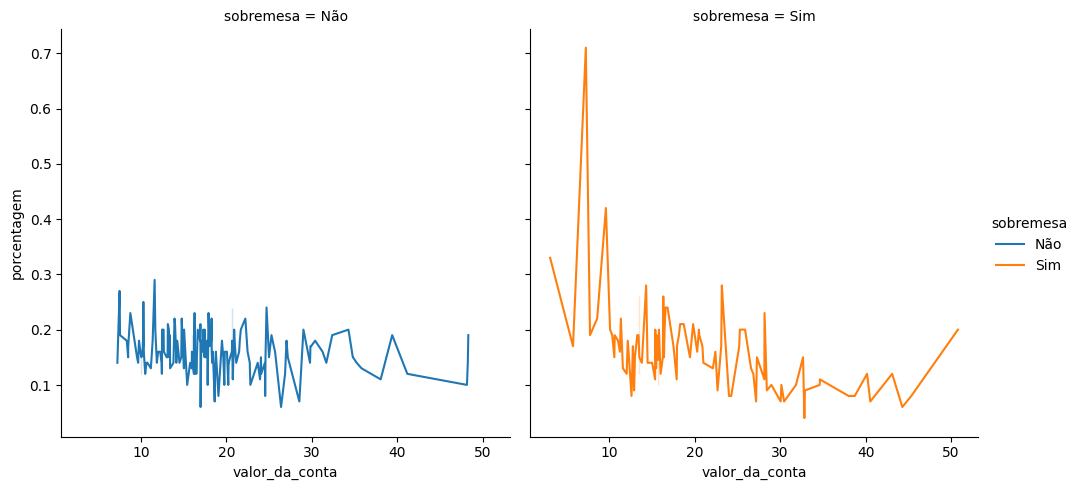

In [ ]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='sobremesa', col='sobremesa', kind='line', data=gorjetas)

#### Existe diferença estatísticamente significativa?
**H<sup>null</sup>** A distribuição da taxa da gorjeta é a mesma nos dois grupos

**H<sup>alt</sup>** A distribuição da taxa da gorjeta não é a mesma nos dois grupos


In [ ]:
from scipy.stats import ranksums

In [ ]:
sobremesa = gorjetas.query("sobremesa=='Sim'").porcentagem

In [ ]:
sem_sobremesa = gorjetas.query("sobremesa=='Não'").porcentagem

In [ ]:
statistcas = ranksums(sobremesa, sem_sobremesa)

In [ ]:
significancia = 0.05


In [ ]:
statistcas[1] <= significancia

False

####Não rejeita-se a hipótese nula, ou seja, apesar dos dois grupos terem dado diferentes gorjetas entre si, matematicamente essa diferença é insignificante, pois não podemos afirmar que a população de onde foi retirada a amostra também será diferente

####O p-value representa a probabilidade da amostra ter acontecido dentro da população

#Analisando as gorjetas em relação ao dia da semana

In [ ]:
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

In [ ]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


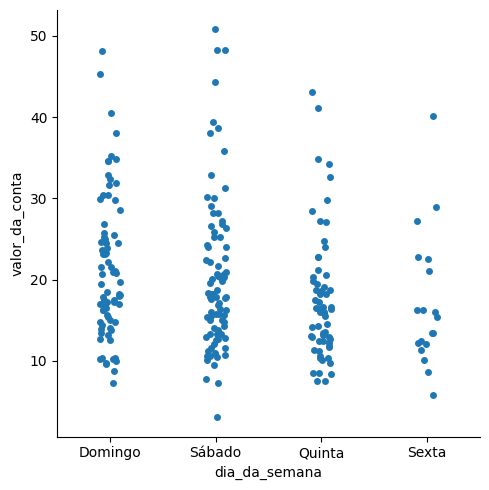

In [ ]:
sns.catplot(x='dia_da_semana', y='valor_da_conta', data=gorjetas)

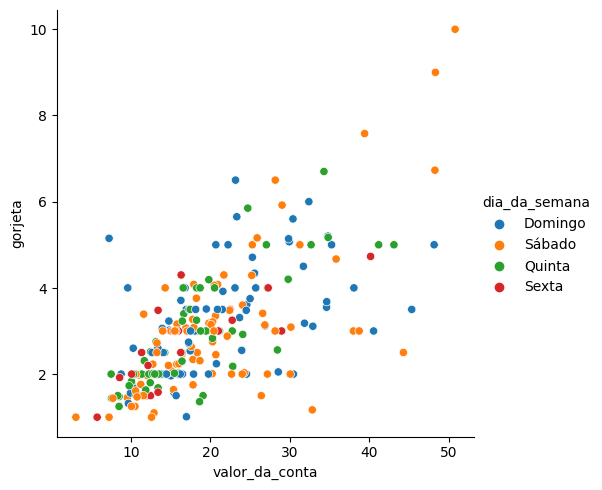

In [ ]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', data=gorjetas)

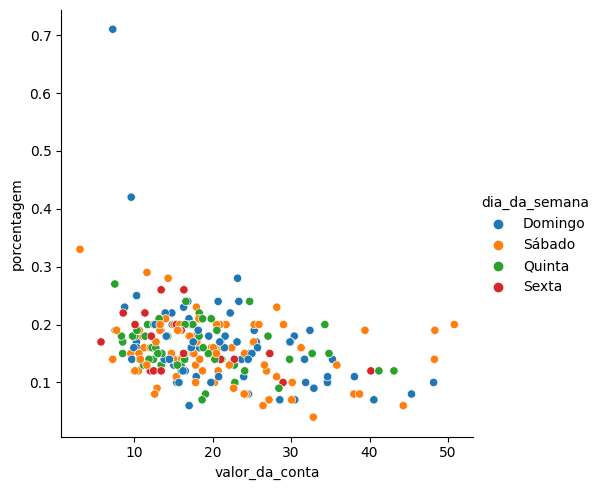

In [ ]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', data=gorjetas)

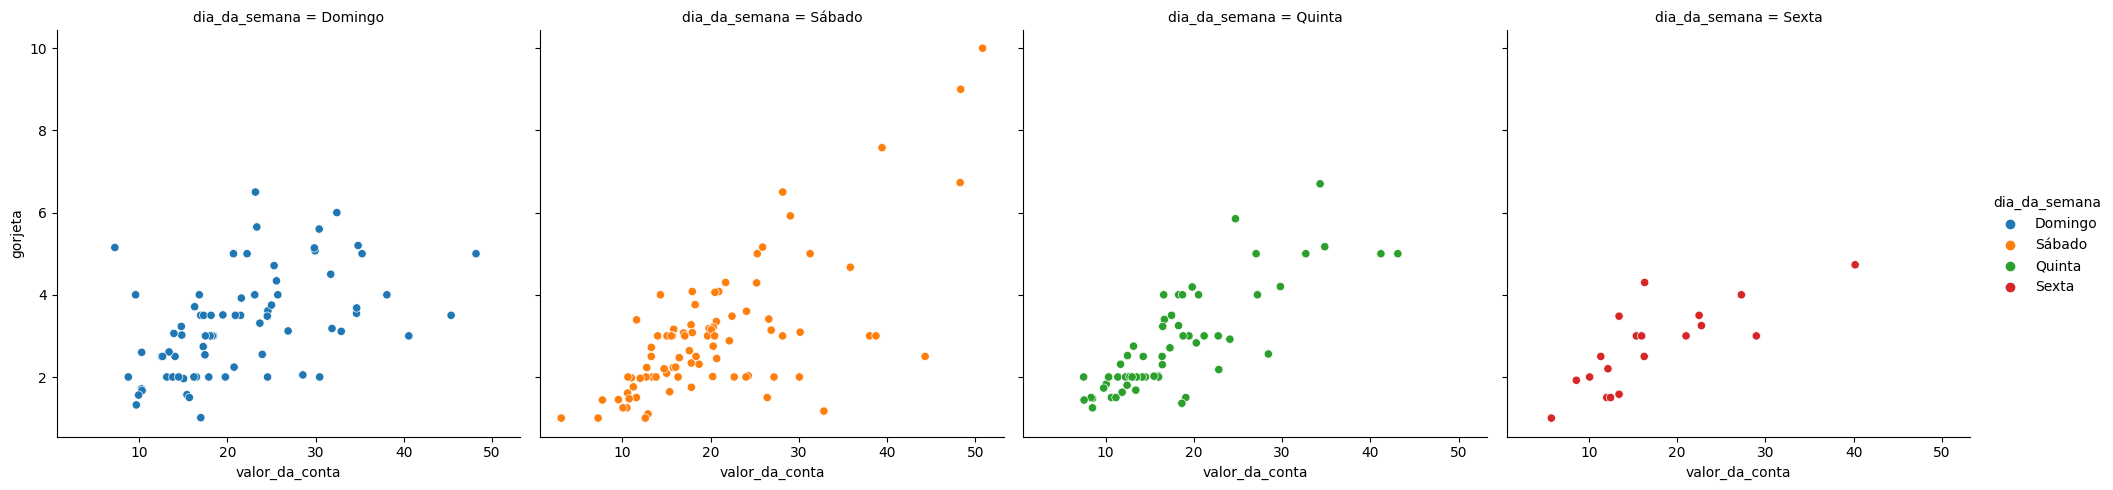

In [ ]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

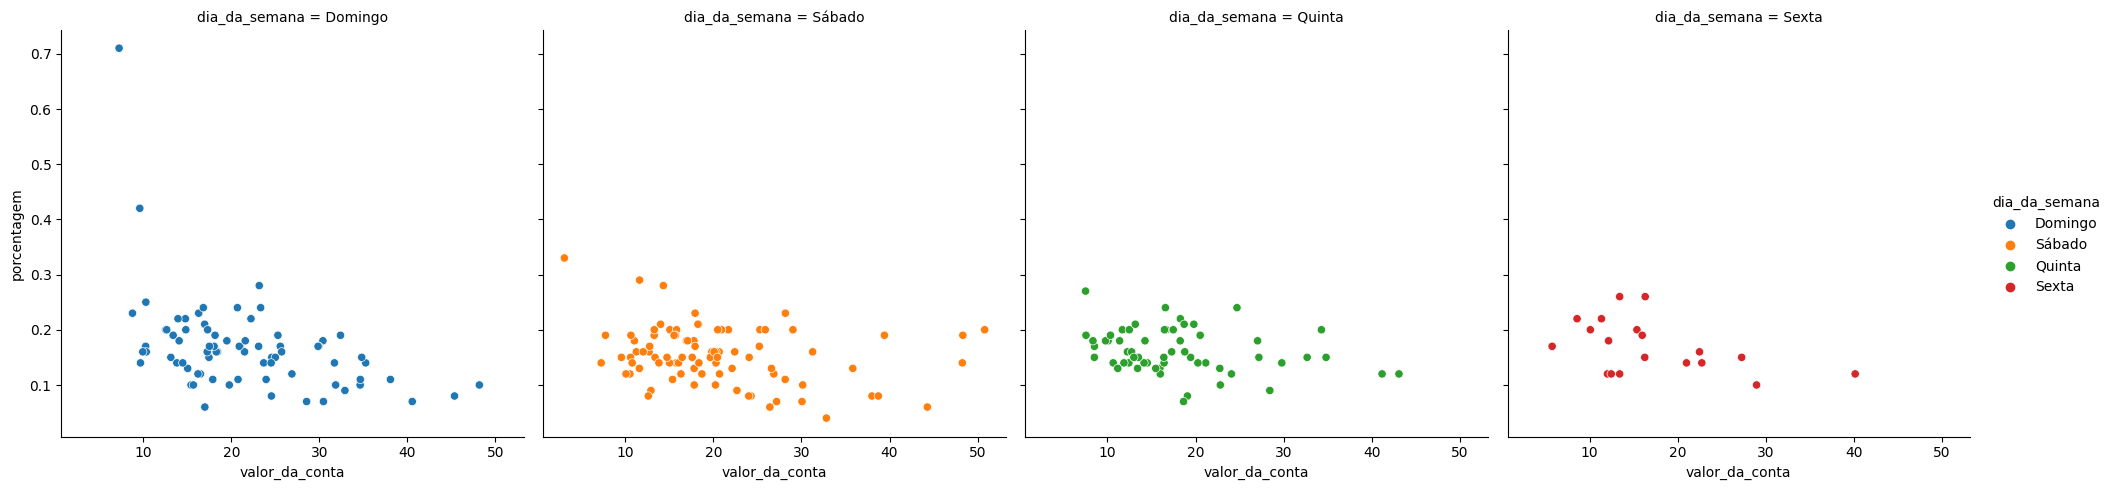

In [ ]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

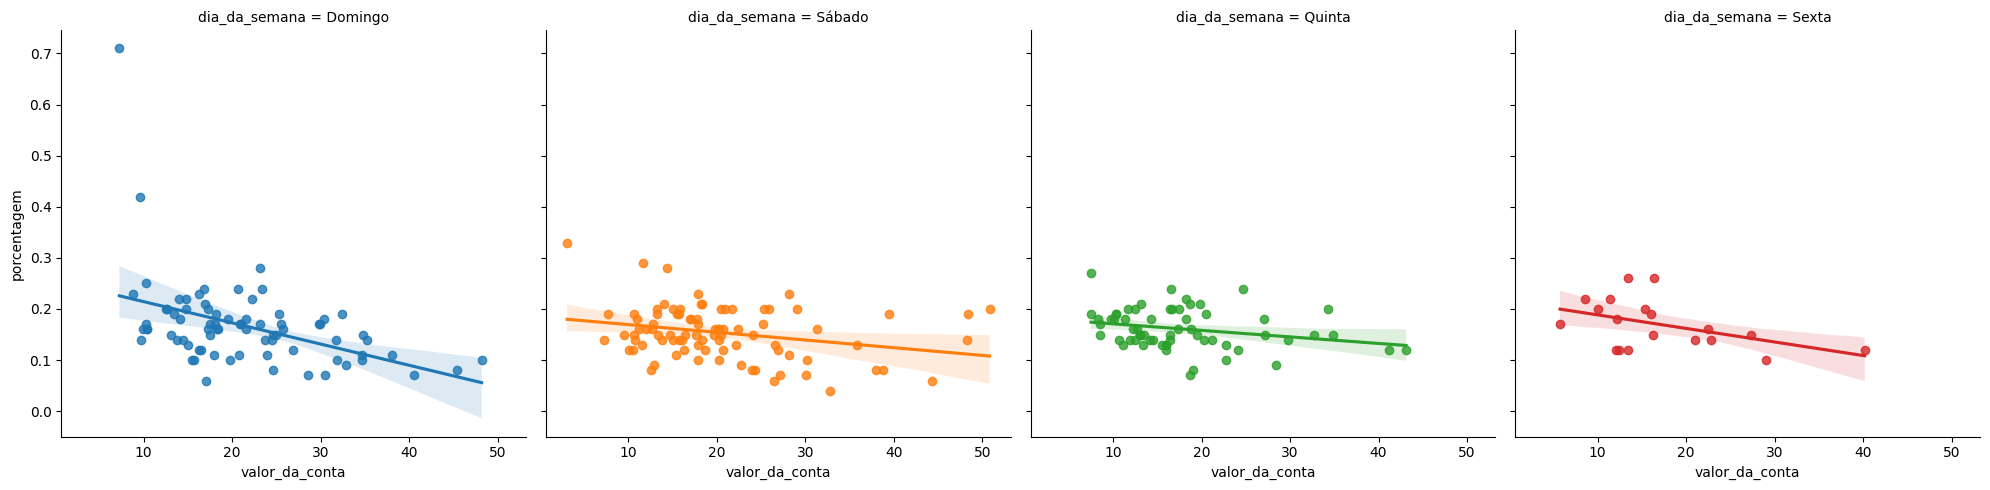

In [ ]:
sns.lmplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

In [ ]:
media_geral_gorjeta = gorjetas.gorjeta.mean()

In [ ]:
gorjetas.groupby('dia_da_semana').mean()[['valor_da_conta', 'gorjeta', 'porcentagem']].round(4)

<ipython-input-130-8a8dc734170e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gorjetas.groupby('dia_da_semana').mean()[['valor_da_conta', 'gorjeta', 'porcentagem']].round(4)


,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.4100,3.2551,0.1670
Quinta,17.6827,2.7715,0.1611
Sexta,17.1516,2.7347,0.1695
Sábado,20.4414,2.9931,0.1537


In [ ]:
print('frequência por dia da semana')
gorjetas.dia_da_semana.value_counts()

frequência por dia da semana


Sábado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia_da_semana, dtype: int64

#Teste de hipótese
**H<sup>null</sup> A distribuição do valor da conta é igual no sábado e no domingo**

**H<sup>alt</sup> A distribuição do valor da conta não é igual no sábado e no domingo**



In [ ]:
valor_conta_domingo = gorjetas.query("dia_da_semana=='Domingo'").valor_da_conta

In [ ]:
valor_conta_sabado = gorjetas.query("dia_da_semana=='Sábado'").valor_da_conta

In [ ]:
ranksums(valor_conta_domingo, valor_conta_sabado)

RanksumsResult(statistic=0.9198084864360142, pvalue=0.3576728477868443)

####Não rejeita-se a hipótese nula, portanto a distribuição do valor da conta é igual

#Análise acerca da hora do dia

In [ ]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [ ]:
gorjetas.hora_do_dia.unique()

array(['Jantar', 'Almoço'], dtype=object)

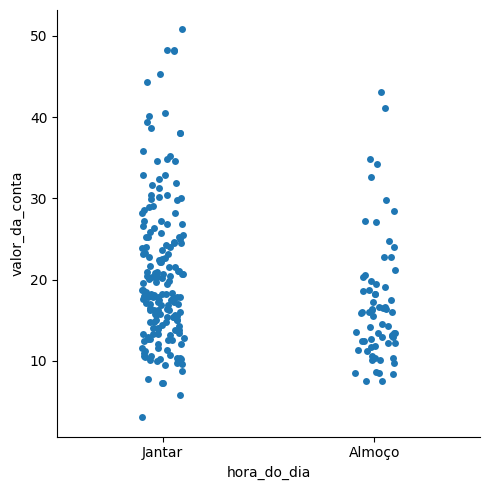

In [ ]:
sns.catplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

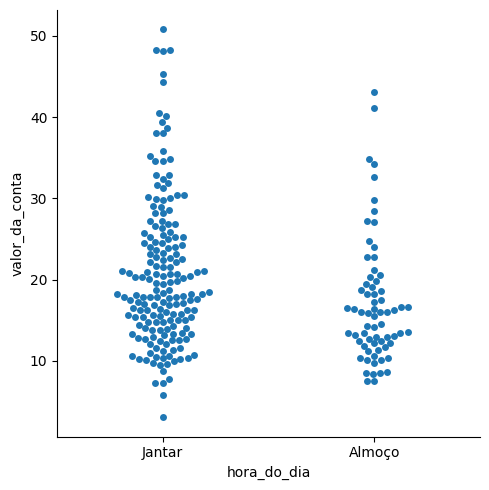

In [ ]:
sns.catplot(x='hora_do_dia', y='valor_da_conta',kind='swarm', data=gorjetas)

<Axes: xlabel='hora_do_dia', ylabel='valor_da_conta'>

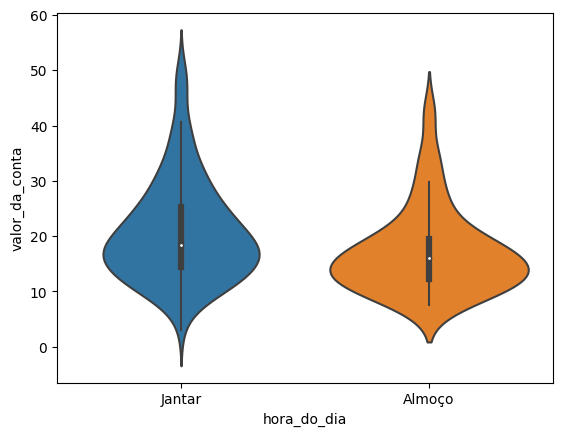

In [ ]:
sns.violinplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

<Axes: xlabel='hora_do_dia', ylabel='valor_da_conta'>

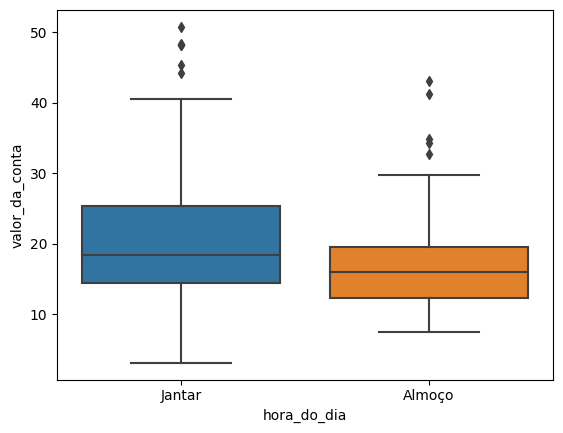

In [ ]:
sns.boxplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

In [ ]:
almoço = gorjetas.query("hora_do_dia =='Almoço'").valor_da_conta

In [ ]:
jantar = gorjetas.query("hora_do_dia =='Jantar'").valor_da_conta

<ipython-input-149-9255a55cf140>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(almoço)


<Axes: xlabel='valor_da_conta', ylabel='Density'>

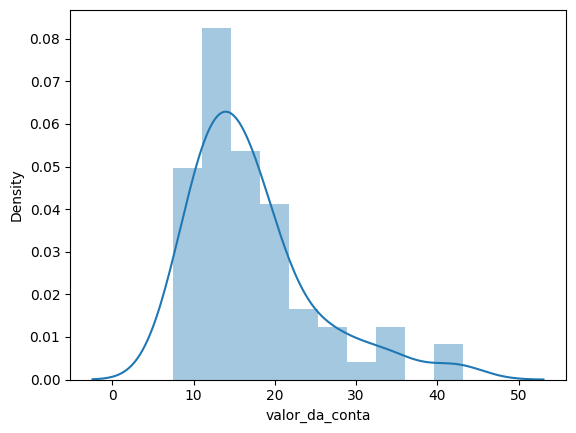

In [ ]:
sns.distplot(almoço)

<ipython-input-146-555589f4c3a4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(almoço, kde=False)


<Axes: xlabel='valor_da_conta'>

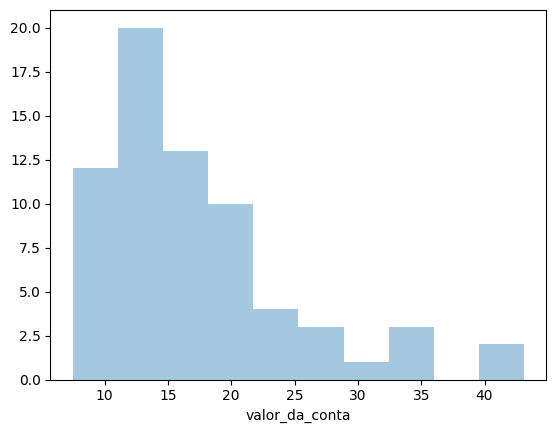

In [ ]:
sns.distplot(almoço, kde=False)

<ipython-input-148-367de2d91156>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(jantar)


<Axes: xlabel='valor_da_conta', ylabel='Density'>

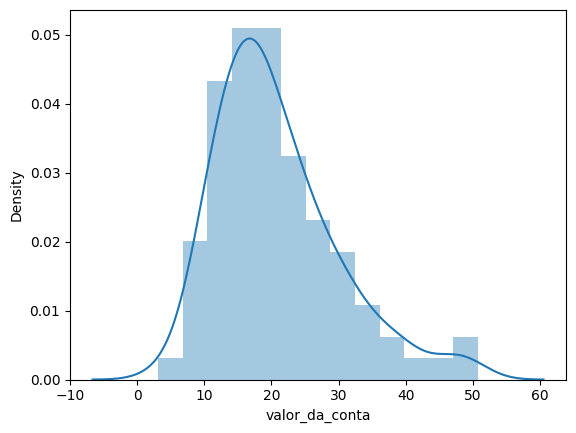

In [ ]:
sns.distplot(jantar)

<ipython-input-151-273362763c6e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(jantar, kde=False)


<Axes: xlabel='valor_da_conta'>

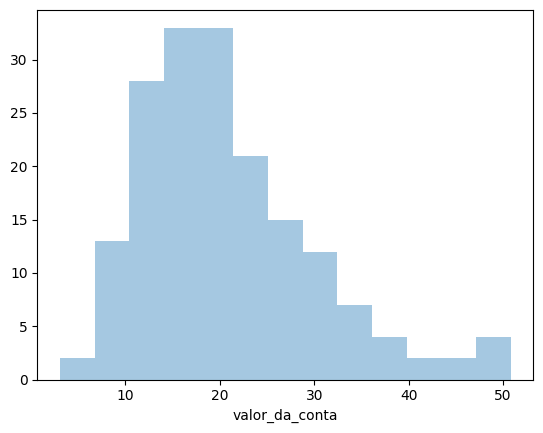

In [ ]:
sns.distplot(jantar, kde=False)

In [ ]:
gorjetas.groupby('hora_do_dia').mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

<ipython-input-153-f438ad287a36>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gorjetas.groupby('hora_do_dia').mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]


,valor_da_conta,gorjeta,porcentagem
hora_do_dia,,,
Almoço,17.168676,2.728088,0.163971
Jantar,20.797159,3.102670,0.159773


#Teste de hipótese

**H<sup>null</sup> A distribuição do valor da conta é igual no jantar e no almoço**

**H<sup>alt</sup> A distribuição do valor da conta não é igual no jantar e no almoço**

In [ ]:
ranksums(almoço, jantar)

RanksumsResult(statistic=-3.2438872807262955, pvalue=0.0011791039723641672)

####Rejeita-se a hipótese nula, portanto a distribuição do valor da conta não é igual em relação ao almoço e ao jantar

#Teste de hipótese

**H<sup>null</sup> A distribuição da taxa da gorjeta é igual no jantar e no almoço**

**H<sup>alt</sup> A distribuição da taxa da gorjeta não é igual no jantar e no almoço**

In [ ]:
porcentagem_almoço = gorjetas.query("hora_do_dia =='Almoço'").porcentagem

In [ ]:
porcentagem_jantar = gorjetas.query("hora_do_dia =='Jantar'").porcentagem

In [ ]:
ranksums(porcentagem_almoço, porcentagem_jantar)

RanksumsResult(statistic=1.1258018532735787, pvalue=0.2602493995587126)

####Não rejeita-se a hipótese nula, portanto a distribuição da taxa de gorjeta é igual no almoço e no jantar